# **Student dropout likelihood prediction using Deep Neural Network (DNN)**

## **Определение вероятности отчисления студента используя Глубокую Нейронную Сеть**

### **Цель:** 

построить эффективную модель Глубокой Нейронной Сети для определения вероятномти отчисления студента

### **Используемые данные: **

данные о студентах (личные данные, учебные данные) университета "University of Minho, GuimarÃ£es, Portugal", source: https://www.kaggle.com/datasets/dipam7/student-grade-prediction

**План:**
1. Подготовка данных;
2. Предварительный анализ;
3. Применение моделей, оптимизация;
4. Визуализация.

### 1. Подготовка данных

In [278]:
#Импортируем необходимые библиотеки
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense

In [279]:
# Загружаем данные
dataset = pd.read_csv("/content/drive/MyDrive/project/student-mat.csv")
dataset

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [280]:
# Проверяем типы данных
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [281]:
# Модифируем необходимые типы данных
dataset['school'] = dataset['school'].apply(lambda x: 1 if x == 'GP' else 0)
dataset['sex'] = dataset['sex'].apply(lambda x: 1 if x == 'M' else 0)
dataset['address'] = dataset['address'].apply(lambda x: 1 if x == 'U' else 0)
dataset['famsize'] = dataset['famsize'].apply(lambda x: 1 if x == 'GT3' else 0)
dataset['Pstatus'] = dataset['Pstatus'].apply(lambda x: 1 if x == 'T' else 0)

def parse_job_vals(x):
  if x == 'teacher':
    return 1
  elif x == 'health':
    return 2
  elif x == 'service':
    return 3
  elif x == 'other':
    return 4
  else:
    return 0

dataset['Mjob'] = dataset['Mjob'].apply(parse_job_vals)
dataset['Fjob'] = dataset['Fjob'].apply(parse_job_vals)

def parse_reason_vals(x):
  if x == 'home':
    return 1
  elif x == 'reputation':
    return 2
  elif x == 'course':
    return 3
  else:
    return 0

dataset['reason'] = dataset['reason'].apply(parse_reason_vals)

def parse_guardian_vals(x):
  if x == 'father':
    return 1
  elif x == 'mother':
    return 2
  else:
    return 0
    
dataset['guardian'] = dataset['guardian'].apply(parse_guardian_vals)
dataset['schoolsup'] = dataset['schoolsup'].apply(lambda x: 1 if x == 'yes' else 0)
dataset['famsup'] = dataset['famsup'].apply(lambda x: 1 if x == 'yes' else 0)
dataset['paid'] = dataset['paid'].apply(lambda x: 1 if x == 'yes' else 0)
dataset['activities'] = dataset['activities'].apply(lambda x: 1 if x == 'yes' else 0)
dataset['nursery'] = dataset['nursery'].apply(lambda x: 1 if x == 'yes' else 0)
dataset['higher'] = dataset['higher'].apply(lambda x: 1 if x == 'yes' else 0)
dataset['internet'] = dataset['internet'].apply(lambda x: 1 if x == 'yes' else 0)
dataset['romantic'] = dataset['romantic'].apply(lambda x: 1 if x == 'yes' else 0)
dataset['G3'] = dataset['G3'].apply(lambda x: 1 if x >= 10 else 0)  

dataset

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,1,0,18,1,1,0,4,4,0,1,...,4,3,4,1,1,3,6,5,6,0
1,1,0,17,1,1,1,1,1,0,4,...,5,3,3,1,1,3,4,5,5,0
2,1,0,15,1,0,1,1,1,0,4,...,4,3,2,2,3,3,10,7,8,1
3,1,0,15,1,1,1,4,2,2,0,...,3,2,2,1,1,5,2,15,14,1
4,1,0,16,1,1,1,3,3,4,4,...,4,3,2,1,2,5,4,6,10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,0,1,20,1,0,0,2,2,0,0,...,5,5,4,4,5,4,11,9,9,0
391,0,1,17,1,0,1,3,1,0,0,...,2,4,5,3,4,2,3,14,16,1
392,0,1,21,0,1,1,1,1,4,4,...,5,5,3,3,3,3,3,10,8,0
393,0,1,18,0,0,1,3,2,0,4,...,4,4,1,3,4,5,0,11,12,1


In [282]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   school      395 non-null    int64
 1   sex         395 non-null    int64
 2   age         395 non-null    int64
 3   address     395 non-null    int64
 4   famsize     395 non-null    int64
 5   Pstatus     395 non-null    int64
 6   Medu        395 non-null    int64
 7   Fedu        395 non-null    int64
 8   Mjob        395 non-null    int64
 9   Fjob        395 non-null    int64
 10  reason      395 non-null    int64
 11  guardian    395 non-null    int64
 12  traveltime  395 non-null    int64
 13  studytime   395 non-null    int64
 14  failures    395 non-null    int64
 15  schoolsup   395 non-null    int64
 16  famsup      395 non-null    int64
 17  paid        395 non-null    int64
 18  activities  395 non-null    int64
 19  nursery     395 non-null    int64
 20  higher      395 non-null    int6

### Применение моделей, оптимизация

In [283]:
# Преоброзовываем в матрицы ndarray
df = dataset.values
df

array([[ 1,  0, 18, ...,  5,  6,  0],
       [ 1,  0, 17, ...,  5,  5,  0],
       [ 1,  0, 15, ...,  7,  8,  1],
       ...,
       [ 0,  1, 21, ..., 10,  8,  0],
       [ 0,  1, 18, ..., 11, 12,  1],
       [ 0,  1, 19, ...,  8,  9,  0]])

In [284]:
# Делим значения Х и Y
X = df[:, 0:32]
Y = df[:, 32]

In [285]:
X

array([[ 1,  0, 18, ...,  6,  5,  6],
       [ 1,  0, 17, ...,  4,  5,  5],
       [ 1,  0, 15, ..., 10,  7,  8],
       ...,
       [ 0,  1, 21, ...,  3, 10,  8],
       [ 0,  1, 18, ...,  0, 11, 12],
       [ 0,  1, 19, ...,  5,  8,  9]])

In [286]:
Y

array([0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,

In [287]:
# Нормализуем (масштабируем в диапазоне 0-1) данные с помощью MinMaxScaler
min_max_scaler = MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)
X_scale

array([[1.        , 0.        , 0.42857143, ..., 0.08      , 0.125     ,
        0.31578947],
       [1.        , 0.        , 0.28571429, ..., 0.05333333, 0.125     ,
        0.26315789],
       [1.        , 0.        , 0.        , ..., 0.13333333, 0.25      ,
        0.42105263],
       ...,
       [0.        , 1.        , 0.85714286, ..., 0.04      , 0.4375    ,
        0.42105263],
       [0.        , 1.        , 0.42857143, ..., 0.        , 0.5       ,
        0.63157895],
       [0.        , 1.        , 0.57142857, ..., 0.06666667, 0.3125    ,
        0.47368421]])

In [288]:
# Делим данные на training (80%) и test (20% - test, validation по 10%) 
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.2)
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(316, 32) (39, 32) (40, 32) (316,) (39,) (40,)


In [289]:
# Строим модель и архитектуру DNN
# Инициализация ANN
model = Sequential()
# Добавление слоев с 32 нейронами
model.add(Dense(units=32, activation='relu', input_dim=32))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

In [290]:
# Оптимизация с помощью Стохастического Градиентного Спуска (SGD)
# Считаем ошибку с помощью Логистического Cost Function'a (binary cross entropy)
# Как измерение точности берем метрику accuracy
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

In [291]:
# Учим модель с параметрами: размер пачки (batch) - 32, количество циклов - 100
hist = model.fit(
    X_train, Y_train,
    batch_size=32,
    epochs=100,
    validation_data=(X_val, Y_val)
)

Epoch 1/100
10/10 [==============================] - 1s 19ms/step - loss: 0.6555 - accuracy: 0.6677 - val_loss: 0.6462 - val_accuracy: 0.7179
Epoch 2/100
10/10 [==============================] - 0s 3ms/step - loss: 0.6478 - accuracy: 0.6677 - val_loss: 0.6381 - val_accuracy: 0.7179
Epoch 3/100
10/10 [==============================] - 0s 4ms/step - loss: 0.6422 - accuracy: 0.6677 - val_loss: 0.6313 - val_accuracy: 0.7179
Epoch 4/100
10/10 [==============================] - 0s 4ms/step - loss: 0.6377 - accuracy: 0.6677 - val_loss: 0.6260 - val_accuracy: 0.7179
Epoch 5/100
10/10 [==============================] - 0s 4ms/step - loss: 0.6345 - accuracy: 0.6677 - val_loss: 0.6220 - val_accuracy: 0.7179
Epoch 6/100
10/10 [==============================] - 0s 4ms/step - loss: 0.6320 - accuracy: 0.6677 - val_loss: 0.6189 - val_accuracy: 0.7179
Epoch 7/100
10/10 [==============================] - 0s 4ms/step - loss: 0.6303 - accuracy: 0.6677 - val_loss: 0.6163 - val_accuracy: 0.7179
Epoch 8/100


In [292]:
# Оценка эффективности модели
model.evaluate(X_test, Y_test)[1]

2/2 [==============================] - 0s 6ms/step - loss: 0.4717 - accuracy: 0.7750


0.7749999761581421

In [293]:
# Делаем prediction
prediction = model.predict(X_test)
print(prediction)

[[0.510803  ]
 [0.53960323]
 [0.20265886]
 [0.45627376]
 [0.888494  ]
 [0.50707304]
 [0.8256127 ]
 [0.79652727]
 [0.8383268 ]
 [0.51769465]
 [0.44862294]
 [0.852509  ]
 [0.33818722]
 [0.93263984]
 [0.6717254 ]
 [0.51290977]
 [0.84511125]
 [0.75636244]
 [0.49231914]
 [0.3045023 ]
 [0.87233526]
 [0.93397874]
 [0.7458853 ]
 [0.635481  ]
 [0.6447111 ]
 [0.8837269 ]
 [0.9604107 ]
 [0.3191953 ]
 [0.8870808 ]
 [0.53063536]
 [0.76235   ]
 [0.93451   ]
 [0.80058455]
 [0.6471607 ]
 [0.94728637]
 [0.5999524 ]
 [0.89858514]
 [0.7210074 ]
 [0.6081438 ]
 [0.6759728 ]]


In [294]:
# Интерпретируем полученные данные используя порог 0.80
# Если вероятность того, что студент перейдет в следующий курс/выпуститься выше 80%:
    # определяем его как успешного студента
# Если ниже:
    # определяем его как студента который отчислиться    
prediction = [1 if y >= 0.80 else 0 for y in prediction]
print(prediction)

[0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0]


### Визуализация эффективности модели

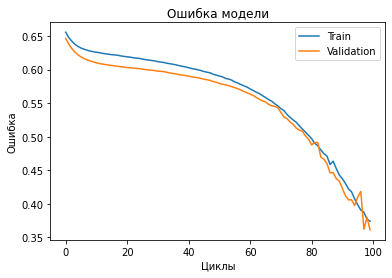

In [295]:
# Визуализация ошибки training и validation сетов, чтобы узнать нет ли overfit'a
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Ошибка модели')
plt.ylabel('Ошибка')
plt.xlabel('Циклы')
plt.legend(['Train', 'Validation'])

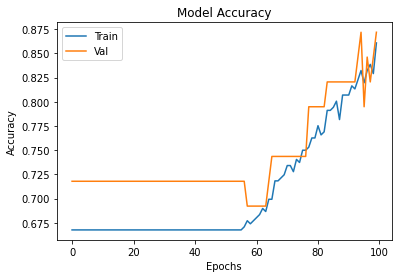

In [297]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Val'])

In [299]:
dataset.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [300]:
example_data = [[1, 1, 22, 1, 1, 1, 4, 3, 1, 3, 0, 1, 3, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 3, 5, 1, 1, 1, 3, 20, 65, 57]]
model.predict(example_data)

array([[1.]], dtype=float32)